# NOTE:
Esse **Jupyter Notebook** terá comentários demasiados pelo os seguintes fatos:
 - Esse é um projeto de estudos;
 - Para quem desejar aprender a partir dos exemplos entenda o que foi feito.

# Pré-Processamento
Comum antes de aplicarmos *Machine Learning* em nosso conjunto de dados fazermos um Pré-Processamento para deixar os dados prontinhos para trabalharmos.

## 01 - Importando as bibliotenas necesárias

Mas antes de iniciar com a aplicação de *Machine Learning* vamos importar as bibliotecas necessárias:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import glob

from minio import Minio

## 02 - Conectando ao Data Lake com o MinIO
Ok, como nós sabemos o **MinIO** é o orquestrador da nossa aplicação. Sabendo disso, nós vamos criar uma `instância` do **MinIO** que vai representar nossa conexão com ***Data Lake***:

In [2]:
client = Minio(
  "localhost:9000",
  access_key="minioadmin",
  secret_key="minioadmin",
  secure=False
)

## 03 - Baixando o Dataset do Data Lake
Agora que nós já criamos uma conexão *(Representação abstrata)* para o nosso ***Data Lake*** com **MinIO** vamos baixar os dados de lá *(Lembrando que nós salvamos esses dados no formato .parquet)*:

In [3]:
client.fget_object(
  "processing", # Landing - Diretório (Bucket) que estamos buscando.
  "employees_dataset.parquet", # Nome do arquivo que vamos baixar.
  "temp_.parquet", # Nome do arquivo temporário para armazenar o que vamos baixar.
)

df = pd.read_parquet("temp_.parquet")

Agora com o nosso conjunto de dados baixados vamos dar uma visualizada apenas nas primeiras amostras:

In [4]:
df.head(10)

,department,salary,left,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1.0,266.000000,2.0,38.0,53.0,3.0,0.0
1,sales,medium,1.0,252.000000,5.0,80.0,86.0,6.0,0.0
2,sales,medium,1.0,289.666667,7.0,11.0,88.0,4.0,0.0
3,sales,low,1.0,275.666667,5.0,72.0,87.0,5.0,0.0
4,sales,low,1.0,292.333333,2.0,37.0,52.0,3.0,0.0
5,sales,low,1.0,271.000000,2.0,41.0,50.0,3.0,0.0
6,sales,low,1.0,268.666667,6.0,10.0,77.0,4.0,0.0
7,sales,low,1.0,274.666667,5.0,92.0,85.0,5.0,0.0
8,sales,low,1.0,269.333333,5.0,89.0,100.0,5.0,0.0
9,sales,low,1.0,280.000000,2.0,42.0,53.0,3.0,0.0


## 04 - Organizando o Dataset (Colunas ou Features)
Ok, agora com os dados baixados vamos organizar algumas coisas para ficar mais fácil de trabalhar. A primeira coisa que vamos fazer aqui será ordenar as colunas:

In [5]:
df = df[
  [
    'department',
    'salary',
    'mean_work_last_3_months',
    'number_projects',
    'satisfaction_level',
    'last_evaluation',
    'time_in_company',
    'work_accident',
    'left'
  ]
]

Agora com as colunas ordenadas da maneira que nós desejamos, vamos  agora visualizar para ver como ficou:

In [6]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0


## 05 - Verificando os registros missing
Bem, agora nós vamos iniciar a faze de Pré-Processamento dos dados. De início vamos ver se temos registros nulos:

In [7]:
df.isnull().sum()

department                 1
salary                     1
mean_work_last_3_months    0
number_projects            1
satisfaction_level         1
last_evaluation            1
time_in_company            1
work_accident              1
left                       1
dtype: int64

**NOTE:**  
Veja que nós só temos um registro nulo.

Uma maneira inteligente de ver qual é esse registro (ou amostra) é utilizar a função **notnull()** do Pandas que exibe apenas os registros (amostras) `não nulas`:

In [8]:
df[df.notnull()]

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
14995,support,low,253.333333,2.0,37.0,48.0,3.0,0.0,1.0
14996,support,low,288.000000,2.0,37.0,53.0,3.0,0.0,1.0
14997,support,low,272.000000,6.0,11.0,96.0,4.0,0.0,1.0
14998,support,low,276.666667,2.0,37.0,52.0,3.0,0.0,1.0


**NOTE:**  
Veja que apenas o último registro está com dados faltantes. E mesmo assim ele ainda tem dados referentes a média de horas trabalhadas. Então, cabe a você pensar se esse dado é crucial ou não para a análise.

Para nosso exemplo, vamos apenas excluir essa amostra, já que só tem ela:

In [9]:
df = df[:14998]

## 06 - Alterando os tipos de dados
Agora nós vamos ver qual o tipo de dado em cada coluna (feature) do nosso Dataset. Para isso vamos primeiro utilizar o atributo **dtypes** do Pandas para fazer essa verificação:

In [10]:
df.dtypes

department                  object
salary                      object
mean_work_last_3_months    float64
number_projects            float64
satisfaction_level         float64
last_evaluation            float64
time_in_company            float64
work_accident              float64
left                       float64
dtype: object

Talvez os dados já estejam da maneira que nós precisamos, mas vou aplicar um Pré-Processamento bem básico só para vocês aprenderem como funciona na prática essa alteração de tipos de dados:

In [11]:
df["number_projects"] = df["number_projects"].astype(int)
df["mean_work_last_3_months"] = df["mean_work_last_3_months"].astype(int)
df["time_in_company"] = df["time_in_company"].astype(int)
df["work_accident"] = df["work_accident"].astype(int)
df["left"] = df["left"].astype(int)

**NOTE:**  
Outra maneira de visualizar os tipos de dados e até ter uma visão mais global do nosso Dataset é utilizar a função **info()**.

Vamos ver na prática como fica mais bonito:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   department               14998 non-null  object 
 1   salary                   14998 non-null  object 
 2   mean_work_last_3_months  14998 non-null  int64  
 3   number_projects          14998 non-null  int64  
 4   satisfaction_level       14998 non-null  float64
 5   last_evaluation          14998 non-null  float64
 6   time_in_company          14998 non-null  int64  
 7   work_accident            14998 non-null  int64  
 8   left                     14998 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.0+ MB


In [13]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


## 07 - Renomeando atributos (Features)
Bem, agora nós vamos renomear esses atributos (features) para ficar mais parecido com o nosso problema. Ou seja, vamos dar nomes mais limpos:

In [14]:
df = df.rename(columns={
  'satisfaction_level': 'satisfaction',
  'last_evaluation': 'evaluation',
  'number_projects': 'projectCount',
  'mean_work_last_3_months': 'averageMonthlyHours',
  'time_in_company': 'yearsAtCompany',
  'work_accident': 'workAccident',
  'left' : 'turnover'
})

In [15]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


# Machine Learning

> **Agora sim nós vamos colocar em prática um pouco de *Machine Learning*.**

## 08 - Convertendo atributos em categorias
Ok, agora que nós vamos iniciar de fato a aplicação de Algoritmos de *Machine Learning* em nosso conjunto de dados, vale salientar que nós conhecemos os atributos (variáveis) do nosso dataset como **Features**.

Agora vem a questão crucial que é:

> Quais **Features** são realmente importantes (cruciais) para os meus Algoritmos tentarem fazer alguma `predição (predict)`?

**NOTE:**  
Bem, por agora vamos focar no seguinte. A maioria dos Algoritmos de *Machine Learning* trabalham com nossas **Features** como se fossem dados numéricos. Mas se você olhar bem as **Features** *departament* e *salary* não estão no formato numérico.

Veja abaixo:

In [16]:
df.dtypes

department              object
salary                  object
averageMonthlyHours      int64
projectCount             int64
satisfaction           float64
evaluation             float64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
dtype: object

**NOTE:**  
Veja que ambas **Features** são do tipo object. Uma alternativa (é só uma alternativa, não que dizer que sempre você deve utilizar essa approach) é categorizar essas **Features**.

Para fazer isso é muito simples, com Pandas:

In [17]:
df['department'] = df['department'].astype('category').cat.codes
df['salary'] = df['salary'].astype('category').cat.codes

In [18]:
df.dtypes

department                int8
salary                    int8
averageMonthlyHours      int64
projectCount             int64
satisfaction           float64
evaluation             float64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
dtype: object

Veja que agora as **Features** estão do tipo *int*. Vamos visualizar isso para ver como fica na prática:

In [19]:
df.head(50)

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,7,1,266,2,38.0,53.0,3,0,1
1,7,2,252,5,80.0,86.0,6,0,1
2,7,2,289,7,11.0,88.0,4,0,1
3,7,1,275,5,72.0,87.0,5,0,1
4,7,1,292,2,37.0,52.0,3,0,1
5,7,1,271,2,41.0,50.0,3,0,1
6,7,1,268,6,10.0,77.0,4,0,1
7,7,1,274,5,92.0,85.0,5,0,1
8,7,1,269,5,89.0,100.0,5,0,1
9,7,1,280,2,42.0,53.0,3,0,1


**NOTE:**  
Mas o que muda essa approach de apenas nós mudarmos nós mesmos para o tipo *int*?

**NOTE:**  
Bem, o que acontece é que por baixo dos panos nós classificamos (categorizamos) cada departamento e cada tipo de salário por valores numéricos.

Não entendeu? Veja os códigos abaixo para ficar mais claro:

In [20]:
departament_rate = df.department.value_counts()
departament_rate

7    4140
9    2720
8    2228
0    1227
6     902
5     858
1     787
2     767
3     739
4     630
Name: department, dtype: int64

In [21]:
salary_rate = df.salary.value_counts()
salary_rate

1    7315
2    6446
0    1237
Name: salary, dtype: int64

Veja que:
 - Antes nós tinhamos 10 tipos de departamentos e agora nós temos uma classificação de departamentos de 0 e 9 (ou seja 10);
 - E tinhamos 3 tipos de salários (Low, Medium e Hight) e agora temos uma classificação de 0 a 2 (ou seja 3).

**NOTE:**  
Na verdade **talvez** essa seja uma das maneiras mais inteligentes de se trabalhar com dados não numéricos. Classificamos eles para só depois relacionarmos eles com outras **Features**.

## 09 - Separando os conjuntos de dados
Bem, como nós sabemos é comum em Machine Learning nós termos as variáveis:

 - Variáveis *independentes*, entradas ou preditoras;
 - Variáveis *dependentes*, saídas ou respostas.

Agora nós vamos separar essas *variáveis (features)* para só depois aplicarmos em um Algoritmo de *Machine Learning*:

In [22]:
target_name = 'turnover'
x = df.drop('turnover', axis=1)
y = df[target_name]

Vamos agora visualizar isso:

In [23]:
x

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident
0,7,1,266,2,38.0,53.0,3,0
1,7,2,252,5,80.0,86.0,6,0
2,7,2,289,7,11.0,88.0,4,0
3,7,1,275,5,72.0,87.0,5,0
4,7,1,292,2,37.0,52.0,3,0
...,...,...,...,...,...,...,...,...
14993,9,1,279,6,76.0,83.0,6,0
14994,8,1,287,2,40.0,57.0,3,0
14995,8,1,253,2,37.0,48.0,3,0
14996,8,1,288,2,37.0,53.0,3,0


In [24]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14993    1
14994    1
14995    1
14996    1
14997    1
Name: turnover, Length: 14998, dtype: int64

## 10 - Normalizando os dados
Bem, como vocês já viram nossas **Features** (eixo x) estão em várias ordem de grandeza. Ou seja, é muito interessante nós trazermos todas as features para a mesma ordem de grandeza:

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Instance
x = scaler.fit_transform(x)
x

array([[0.77777778, 0.5       , 0.38202247, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.77777778, 1.        , 0.2247191 , ..., 0.78125   , 0.5       ,
        0.        ],
       [0.77777778, 1.        , 0.64044944, ..., 0.8125    , 0.25      ,
        0.        ],
       ...,
       [0.88888889, 0.5       , 0.23595506, ..., 0.1875    , 0.125     ,
        0.        ],
       [0.88888889, 0.5       , 0.62921348, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.88888889, 0.5       , 0.4494382 , ..., 0.9375    , 0.25      ,
        0.        ]])

**NOTE:**  
Veja que agora os dados das nossas *features* estão na mesma ordem de grandeza.

## 11 - Separando os dados em dados de treino e dados de teste
Ok, agora que nós já normalizamos nossos dados vamos separar eles entre **dados de treino** e **dados de teste**:

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
  x,
  y,
  test_size = 0.2,
  random_state = 123,
  stratify = y
)

**NOTE:**  
Bem, como vocês sabem a nossa variável **target (turnover)** está muito desbalanceada *(76% para funcionarários que permanerem e 23% dos que deixaram a empresa)*, por isso, vamos aplicar em conjunto com essa separação dos dados em treino e teste o Algoritmo **Stratified K-Fold**.

Isso foi feito quando utilizamos o argumento - **stratify = y**

## 12 - Treinando nosso modelo com o Algoritmo Decision Tree
Um Algoritmo muito utilizado em *Machine Learning* é o **Decision Tree**... Vamos começar utilizando ele para ver como nosso conjunto de dados de comporta:

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier() # Instance.
dtree = dtree.fit(x_train, y_train) # Model Training.

## 13 - Selecionando as melhores features para o nosso modelo
Bem, acima nós praticamente já treinamos o nosso modelo, mas como eu posso saber quais **Features** foram mais relevantes, ou seja, quais são mais importantes?

> Uma approach é utilizar o atributo **feature_importances_** do Algoritmo **Devision Tree**.

Veja como aplicar isso abaixo:

In [28]:
features_percents = dtree.feature_importances_
features_percents

array([0.08166478, 0.02660884, 0.18576826, 0.08017278, 0.30582602,
       0.2128509 , 0.09023336, 0.01687506])

**NOTE:**  
O atributo **feature_importances_** nós retorna quanto *porcento (%)* cada feature (coluna, variável, atributo) contribuiu para o treinamento do nosso modelo.

## 14 - Criando um gráfico para representar as melhores features
Agora vamos criar uma gráfico que vai demonstrar de forma visual quais features foram mais relevantes para o treinamento do nosso modelo:

**NOTE:**  
Mas antes vamos salvar os nomes de todas as features em uma variável - **features_names**:

In [29]:
features_names = df.drop(['turnover'], axis=1).columns
features_names

Index(['department', 'salary', 'averageMonthlyHours', 'projectCount',
       'satisfaction', 'evaluation', 'yearsAtCompany', 'workAccident'],
      dtype='object')

Pronto, agora que já temos os nomes de todas nossas *features (variáveis, atributos, colunas)* salvas vamos criar nosso gráfico:

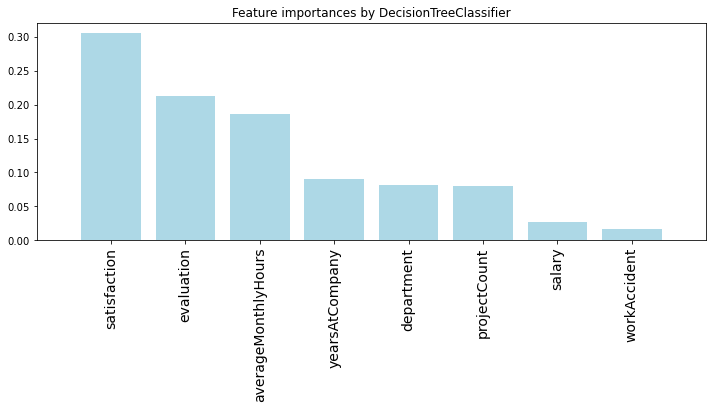

In [30]:
indices = np.argsort(features_percents)[::-1]

# Plot settings
plt.figure(figsize=(12, 4))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(
  range(len(indices)),
  features_percents[indices],
  color='lightblue',
  align="center"
)

plt.xticks(
  range(len(indices)),
  features_names[indices],
  rotation='vertical',
  fontsize=14)
plt.xlim([-1, len(indices)])

plt.show()

## 15 - Filtrando apenas as Features mais relevantes
Bem, agora que nós já sabemos quais *Features* são mais relevantes, vamos aplicar um tipo de filtro para o nosso modelo aprender, porém, apenas com as *Features* mais importantes.

Primeiro, vamos passar para a nossa variável **"x"** apenas as *Features* mais relevantes:

In [31]:
x = df[
  [
    "satisfaction",
    "evaluation",
    "averageMonthlyHours",
    "yearsAtCompany"
  ]
]

Agora  nós vamos novamente:
 - Normalizar os dados;
 - E separar em dados de treino e dados de teste.

**NOTE:**  
Por que fazer esse processo novamente? Porque quando nós utilizamos `df[x, y,z]` nós trouxemos os dados originais do dataset, ou seja, sem normalização e separação.

In [32]:
# Data normalization.
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Data splitting.
x_train, x_test, y_train, y_test = train_test_split(
  x,
  y,
  test_size = 0.2,
  random_state = 123,
  stratify = y
)

## 16 - Definindo uma função para representar um "Modelo de Baseline"
Para entender como funciona um **modelo de baseline**, vamos seguir com a seguinte analogia:

Se eu jogar uma moeda **"n"** vezes (um processo aleatório), onde:

 - **Cara** vai representar as pessoas que permaneceram na empresa (0 no nosso dataset);
 - **Coroa** vai representar as pessoas que deixaram a empresa (1 no nosso dataset).

Agora vem a pergunta chave:

> **Será que o meu modelo vai ganhar ou predizer melhor do que essas jogadas aleatórias?

**NOTE:**  
Imagine que nós criamos um recurso aleatório (por exemplo, um programa) que entregue 0 ou 1 para representar pessoas que permanecem e saíram da empresa - **Se o nosso modelo for *menos inteligente* que isso não valeu de nada nosso trabalho**.

**NOTE:**  
Essa analogia que nós seguimos acima é apenas um exemplo. O importante aqui a se saber é que nosso **modelo de baseline** é algo que nós vamos bater (ou ganhar) quando comparado com nossos Algoritmos de Machine Learning, senão, nosso modelo de Machine Learning é ineficiente se comparado com ele **(modelo de baseline)**.

---

Outro exemplo (analogia) aqui seria a seguinte. Suponha, que nós vamos tentar estimar quantas vendas nós vamos ter por dia. Agora imagine que o meu **modelo de baseline** segue a seguinte lógica para fazer essa estimativa:

> O meu **modelo de baseline** tira a média de todas as vendas por dia e faz uma estimativa baseada nessa média.

**NOTE:**  
Ou seja, para o meu Algoritmo de *Machine Learning* predizer ou ganhar do meu **modelo de baseline** ele vai ter que ser melhor do que apenas tirar a média de todas as vendas por dia. O que faz todo sentido, porque se o meu Algoritmo for menos eficiente do que tirar a média (que é uma estatística muita básica) talvez não vala a pena seguir a lógica do Algoritmo implementado.

**NOTE:**  
Por fim, vale salientar que o nosso **modelo de baseline** pode ser uma ***referência*** quando formos apresentar nossa solução. Por exemplo:

 - O meu Algoritmo **"x"** é melhor **"n" porcento (%)** se comparado com a média (de vendas por exemplo);
 - O meu Algoritmo **"x"** é melhor **"n" porcento (%)** se comparado com um recurso aleatório...

Veja o código abaixo para ver um exemplo (muito simples) de **modelo de baseline**:

In [33]:
def baseline_model(x):
  y = np.zeros(x.shape[0])
  return y

**NOTE:**  
O que o nosso **modelo de baseline** acima fez foi o seguinte:

> Pegou um conjunto de dados **"x"** e retornou **0** para todos os elementos.

## 17 - Importando métodos de métrica de avaliação
Agora nós vamos importar os métodos do Scikit-Learn que nós vamos utilizar para fazer uma avaliação de métrica sobre nosso modelo:

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Agora nós vamos criar uma função que retorna a **accuracy** do nosso modelo, ou seja, quanto porcento (%) nosso modelo acertou? Essa função vai receber:
 - Os dados y de teste;
 - O que o nosso modelo ou modelo de baseline preveu.
 - Por fim, retorna accuracy do nosso modelo. Ou seja, quanto porcento (%) nosso modelo ou modelo de baseline acertou.

In [35]:
def accuracy_result(y_test, y_predicted_model_or_baseline):
  accuracy = accuracy_score(y_test, y_predicted_model_or_baseline)
  print ("Accuracy = %2.2f" % accuracy)

Agora vamos criar uma função que nós retorna a curva ROC e outras análises interessantes:

In [36]:
def roc_classification_report_results(model, y_test, y_predicted_model_or_baseline):
  roc_ = roc_auc_score(y_test, y_predicted_model_or_baseline)
  classfication_report = classification_report(y_test, y_predicted_model_or_baseline)
    
  print ("\n{} AUC = {}\n".format(model, roc_))
  print(classfication_report)

## 18 - Testando nosso modelo de baseline
Bem, agora chegou a hora de testar nosso **modelo de baseline**. Para esse exemplo o que nós vamos fazer é passar os **dados "x" de teste** para o nosso *modelo de baseline* (que nós sabemos que vai retornar 0 para todos os elementos):

In [37]:
y_predicted_baseline = baseline_model(x_test)

**NOTE:**  
Bem, agora nós vamos chamar a função **accuracy_result()** que recebe como argumento:
 - Os y de teste;
 - E o resultado do nosso modelo de baseline (y_predicted_baseline);
 - Por fim, retorna qual a accuracy do nosso d

In [38]:
accuracy_result(y_test, y_predicted_baseline)

Accuracy = 0.76


**NOTE:**  
Veja que o nosso **modelo de baseline** teve um acerto de 76%.

In [39]:
roc_classification_report_results("Base Model", y_test, y_predicted_baseline)


Base Model AUC = 0.5

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2286
           1       0.00      0.00      0.00       714

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



/home/drigols/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**NOTE:**  
Veja que nós não acertamos nenhuma na classe 1, isso porque os dados que nós tivemos como retorno da função **baseline_model()** foram todos 0 como nós definimos.

**NOTE:**  
Outras 2 observações aqui são as seguintes:
 - Primeiro, que a **accuracy** do **modelo de baseline** não reflete bem sobre a realidade do nosso problema.
 - Segundo, os dados estão muito desbalanceados, tanto, que até o Scikit-Learn nós retornou um **warning** sobre isso.

## 19 - Treinando nosso modelo com o Algoritmo de Regressão Logística
Ok, agora nós vamos treinar nosso modelo novamente, porém, utlizando o Algoritmo de **Regressão Logística**:

In [40]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

logis.fit(x_train, y_train)
y_predict = logis.predict(x_test)

**NOTE:**  
Agora que nós já treinamos nosso modelo vamos verificar qual foi a **accuracy** do nosso modelo, ou seja, quanto porcento (%) ele acertou:

In [41]:
accuracy_result(y_test, y_predict)

Accuracy = 0.75


In [42]:
roc_classification_report_results("Logistic Regression", y_test, y_predict)


Logistic Regression AUC = 0.5050820853275694

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      2286
           1       0.32      0.03      0.05       714

    accuracy                           0.75      3000
   macro avg       0.54      0.51      0.46      3000
weighted avg       0.66      0.75      0.67      3000



## 20 - Treinando nosso modelo com o Algoritmo de Arvore de decisão (de novo)

> Será que com um Algoritmo de Machine Learning diferente nós conseguimos uma **accuracy** melhor?

Então, só existe uma maneira de saber a resposta acima - **TESTANDO!**  

---

Sabendo disso agora nós vamos testar o Algoritmo de Árvore de Decisão (Decision Tree):

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier() # Instance.
dtree = dtree.fit(x_train, y_train) # Model training.
y_predict = dtree.predict(x_test) # Calculating predicts.

**NOTE:**  
Agora que nós já treinamos nosso modelo e calculamos precisões, vamos ver como ficou a **accuracy**:

In [44]:
accuracy_result(y_test, y_predict)

Accuracy = 0.73


In [45]:
roc_classification_report_results("Decision Tree", y_test, y_predict)


Decision Tree AUC = 0.6396240911062588

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2286
           1       0.44      0.47      0.45       714

    accuracy                           0.73      3000
   macro avg       0.63      0.64      0.64      3000
weighted avg       0.74      0.73      0.73      3000



**NOTE:**  
Veja que nós tivemos uma **accuracy** menor, porém, nossa curva AUC foi melhor se comparada com outros Algoritmos.

## 21 - Treinando nosso modelo com o Algoritmo de Arvore Aleatória (Random Forest)
Por fim, vamos testar mais um Algoritmo que é o **Árvore Aleatória (Random Forest)**:

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() # Instance.
rf = rf.fit(x_train, y_train) # Model training.
y_predict = rf.predict(x_test) # Calculating predicts.

**NOTE:**  
Agora que nós já treinamos nosso modelo e calculamos precisões, vamos ver como ficou a **accuracy**:

In [47]:
accuracy_result(y_test, y_predict)

Accuracy = 0.80


In [48]:
roc_classification_report_results("Random Forest", y_test, y_predict)


Random Forest AUC = 0.6880059110258278

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2286
           1       0.61      0.47      0.53       714

    accuracy                           0.80      3000
   macro avg       0.73      0.69      0.70      3000
weighted avg       0.79      0.80      0.79      3000



**NOTE:**  
Veja que esse Algoritmo foi o que deu a melhor **accuracy** e melhor **Curva AUC**.

## 22 - Observação sobre "Accuracy" de um modelo
Bem, aqui é só uma observação (análise) que é a seguinte:

> Nós não devemos focar na **accuracy** do nosso modelo quando estivermos dados desbalanceados - Por exemplo, nosso turnover está muito desbalanceado.

**NOTE:**  
Sabendo que não é interessante focar na **accuracy** quando nossos dados estiverem muito desbalanceados é interessante seguir outras approach - **Como Curva AUC**

## 23 - Introdução ao Pycaret

> **Pycaret** para quem não sabe é uma biblioteca para nós trabalharmos com **AutoML (Auto Machine Learning)**

Quais as vantagens do Pycaret? - **Ser mais produtivo**
 - Escrevendo menos códigos;
 - Escolhendo Algoritmos pronto;
 - Escolhendo pipelines;
 - Escolhendo melhores métricas por Algoritmo;
 - Testes de modelos;
 - Comparação de modelos;
 - Menos erro de codificação..

Agora vamos instalar a biblioteca **pycaret**:

In [49]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


Agora que nós já instalamos o **pycaret** vamos importar os métodos de classificação, visto que nós estamos trabalhando em um problema dessa natureza:

In [50]:
from pycaret.classification import *

Agora nós vamos definir um **setup()** para o nosso pycaret, ou seja, quais as configurações nós vamos passar para ele trabalhar:

In [51]:
s = setup(
  df[
      [
        "satisfaction",
        "evaluation",
        "averageMonthlyHours",
        "yearsAtCompany",
        "turnover"
      ]
    ],
    target = "turnover",
    numeric_features = ["yearsAtCompany"], # If pycaret goes wrong you need to fix it.
    normalize = True,
    normalize_method = "minmax",
    data_split_stratify = True,
    fix_imbalance = True,
)

,Description,Value
0,session_id,870
1,Target,turnover
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14998, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


## 24 - Comparando diferentes modelos com Pycaret
Uma das maiores vantagens do **Pycaret** é ver o resultado da **accuracy** para o nosso conjunto de dados em vários Algoritmos de *Machine Learning* diferentes.

**NOTE:**  
Porém, como nós já sabemos que os nossos dados estão desbalanceados (principalmente para a variável target = turnover) nós vamos especificar para o **Pycaret** focar na **Curva AUC** em vários Algoritmos de Machine Learning para nosso conjunto de dados:

In [52]:
best = compare_models(fold = 5, sort = 'AUC',)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8003,0.7700,0.6423,0.5717,0.6048,0.4719,0.4734,0.7260
lightgbm,Light Gradient Boosting Machine,0.8206,0.7656,0.5958,0.6302,0.6123,0.4958,0.4963,1.9760
ada,Ada Boost Classifier,0.7698,0.7629,0.6619,0.5126,0.5777,0.4229,0.4295,0.3340
rf,Random Forest Classifier,0.7857,0.7414,0.5090,0.5541,0.5305,0.3920,0.3927,1.0080
knn,K Neighbors Classifier,0.7054,0.7230,0.6515,0.4228,0.5128,0.3150,0.3302,0.1380
qda,Quadratic Discriminant Analysis,0.7000,0.7221,0.7123,0.4228,0.5306,0.3306,0.3550,0.0540
et,Extra Trees Classifier,0.7784,0.7141,0.4818,0.5384,0.5083,0.3659,0.3670,0.8340
nb,Naive Bayes,0.6915,0.6995,0.5826,0.3986,0.4733,0.2658,0.2755,0.0300
lr,Logistic Regression,0.6657,0.6839,0.6163,0.3765,0.4673,0.2439,0.2597,0.8100
lda,Linear Discriminant Analysis,0.6678,0.6832,0.6115,0.3779,0.4670,0.2449,0.2599,0.0500


**NOTE:**  
Veja que para cada Algoritmo de Machine Learning o **Pycaret** retornou várias métricas, como **accuracy** e **Curva AUC**.

**NOTE:**  
Outra observação é que o **Pycaret** destacou todas às *melhor métrica* em amarelo. E a **Curva AUC (métrica)** que é o que nós interessa foi o Algoritmo GBC.

Agora que nós já sabemos qual foi o melhor Algoritmo (seguindo a métrica de preferência que nós definimos - AUC), vamos exibir ele só para ver o que ele nós retorna:

In [53]:
best

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=870, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## 25 - Treinando nosso modelo com o Algoritmo GBC & Pycaret
Ótimo, agora que o **Pycaret** já nós deu de mão beijada o Algoritmo com melhor **Curva AUC** vamos treinar nosso modelo com esse Algoritmo:

In [54]:
gbc = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7948,0.7567,0.6160,0.5631,0.5883,0.4520,0.4528
1,0.7986,0.7744,0.6460,0.5677,0.6043,0.4700,0.4717
2,0.8086,0.7906,0.6780,0.5845,0.6278,0.4999,0.5024
3,0.8004,0.7618,0.6433,0.5712,0.6051,0.4722,0.4736
4,0.7994,0.7666,0.6280,0.5719,0.5987,0.4654,0.4663
Mean,0.8003,0.7700,0.6423,0.5717,0.6048,0.4719,0.4734
SD,0.0045,0.0118,0.0209,0.0071,0.0129,0.0157,0.0162


**NOTE:**  
Veja que para cada **Fold** o **Pycaret** nós mostra o resultado de cada **métrica**.

## 26 - Realizando o tunning do nosso modelo com Pycaret
Agora nós vamos aplicar o conceito de **Hyperparameter Tuning** com **Pycaret**

In [55]:
tuned_gbc = tune_model(
  gbc,
  fold = 5,
  custom_grid = {
    "learning_rate": [0.1, 0.2, 0.5],
    "n_estimators": [100, 500, 1000],
    "min_samples_split": [1, 2, 5, 10],
    "max_depth": [1, 3, 9]
  },
  optimize = 'AUC'
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7633,0.7564,0.6460,0.5023,0.5652,0.4061,0.4121
1,0.7671,0.7670,0.6460,0.5087,0.5692,0.4127,0.4182
2,0.7714,0.7826,0.6960,0.5148,0.5918,0.4380,0.4476
3,0.7737,0.7574,0.6733,0.5185,0.5859,0.4338,0.4408
4,0.7713,0.7627,0.6740,0.5153,0.5841,0.4302,0.4376
Mean,0.7694,0.7652,0.6671,0.5119,0.5792,0.4242,0.4313
SD,0.0037,0.0095,0.0190,0.0058,0.0102,0.0125,0.0137


**NOTE:**  
 - Primeiro, não se preocupe se demorar muito, pois, o Algoritmo está testando todos os parâmetros passados;
 - Segundo, veja que nós tivemos quase os mesmos resultados de apenas executar o Algoritmo GBC:
   - Isso, porque o Algoritmo GBC já escolheu bons parâmetros na hora do treino, porém, não é sempre assim para todos os Algoritmos e também depende do conjunto de dados.

## 27 - Finalizando nosso modelo com Pycaret
Ok, chegou a hora! Até então nós estavamos nas partes de análise, treinamento de modelos e escolha do melhor Algoritmo de Machine Learning para o nosso problema e conjunto de dados.

Agora que nós já sabemos qual o melhor Algoritmo de Machine Learning para o nosso conjunto de dados vamos treinar esse Algoritmo, porém, utilizando:

> **TODO NOSSO CONJUNTO DE DADOS (OU SEJA, 100% DOS DADOS)**.

**NOTE:**  
Isso mesmo, em um ambiente de produção nosso Algoritmo trabalha com todo nosso conjunto de dados. Os dados de testes já diz tudo - **Estamos apenas testando fora do ambiente de produção**.

O **Pycaret** tem o método **finalize_model()** que pega todo o nosso conjunto de dados e parâmetros e *finaliza* nosso modelo:

In [56]:
final_model = finalize_model(tuned_gbc)

## 28 - Salvando nosso modelo com Pycaret
Com nosso modelo finalizado vamos utilizar o método **save_model()** do **Pycaret** para salvar nosso modelo:

In [57]:
save_model(final_model, 'my_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['yearsAtCompany'],
                                       target='turnover', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=1, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
            

**NOTE**  
Esse modelo está salvo em um arquivo chamado **my_model.pkl** (que foi o nome que nós especificamos na hora de salvar o modelo) no mesmo diretório do nosso *Jupyter Notebook*.

## 29 - Transferindo nosso modelo para o Data Lake
Ótimo, agora que nós já finalizamos todas nossas análises, treinamos nosso modelo, salvamos nosso modelo, chegou a hora de transferir o mesmo para o nosso **Data Lake**.

In [58]:
client.fput_object(
  "curated",
  "my_model.pkl",
  "my_model.pkl"
)

**NOTE:**  
Veja que nós estamos enviando nosso modelo para a **zona (bucket) curated**.

## 30 - Exportando o conjunto de dados para o disco
Ok, agora se eu precisar desse conjunto de dados (DataFrame) já organizado, por exemplo, para exibir em um **App** de visualização de dados?

Simples, primeiro vamos criar uma cópia dele no nosso *disco local* com o método **to_csv()** do Pandas:

In [59]:
df.to_csv("dataset.csv", index=False)

Pronto, agora foi criado no mesmo diretório do nosso *Jupyter Notebook* um arquivo chamado **dataset.csv**.

> E se eu precisar desse arquivo na minha **zona (Bucket) curated**?

Simples, vamos enviar ele para lá agora:

In [60]:
client.fput_object(
  "curated",
  "dataset.csv",
  "dataset.csv"
)